# Part 1: Understanding Product Categories

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. Frequency Tables:



* Generating a frequency table for the product category.

In [4]:
category_freq = df['category'].value_counts().reset_index()
category_freq.columns = ['Category', 'Listing Count']
category_freq

,Category,Listing Count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Motorbike Chassis,107
292,Alexa Built-In Devices,107
293,Plugs,107
294,Smart Home Security & Lighting,104


* Which are the top 5 most listed product categories?

In [5]:
category_freq.head(5)  

,Category,Listing Count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


2. Visualizations:

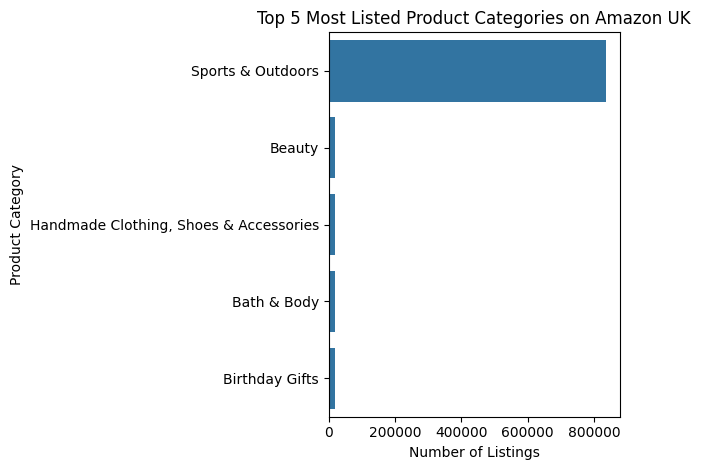

In [6]:

top5 = category_freq.head(5)
sns.barplot(data=top5, x='Listing Count', y='Category')
plt.title('Top 5 Most Listed Product Categories on Amazon UK')
plt.xlabel('Number of Listings')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

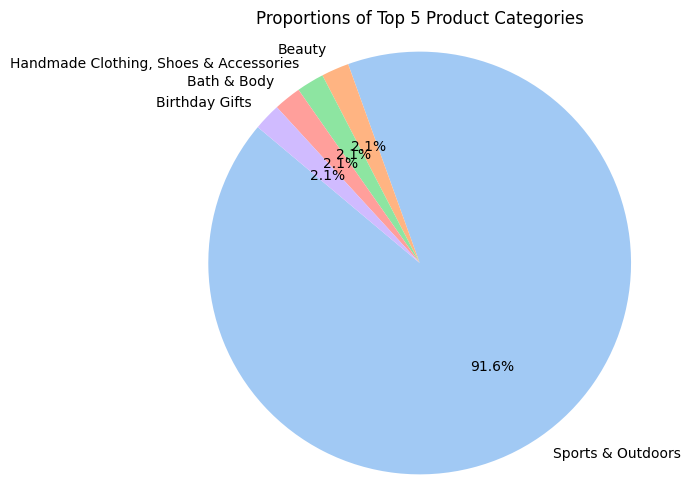

In [7]:
# Pie chart for top 5 categories

plt.figure(figsize=(6, 6))
plt.pie(top5['Listing Count'], labels=top5['Category'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportions of Top 5 Product Categories')
plt.axis('equal')  # Keeps circle shape
plt.show()

# | Top 5 Most Listed Product Categories on Amazon UK:

Based on listing frequency, the most common categories are:

1. Sports & Outdoors

2. Beauty

3. Handmade Clothing, Shoes & Accessories

4. Bath & Body

5. Birthday Gifts

Based on the pie chart : 

the category “Sports & Outdoors” clearly dominates the listings, making up a striking 91.6% of the top 5 categories


# Part 2: Delving into Product Pricing

## Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. Measures of Centrality:

* Calculating the mean, median, and mode for the price of products.

In [8]:

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

print(f"Mean: {mean_price:.2f}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")  

Mean: 89.24
Median: 19.09
Mode: 0    9.99
Name: price, dtype: float64


- Average price: $89.24

- Most common price (mode): $9.99

The dataset shows a strongly right-skewed distribution. While the average price is elevated due to a few high-priced products, the vast majority of listings cluster around much lower price points.

This means:

- The average doesn't represent what buyers typically encounter.

- The mode ($9.99) suggests a strategic pricing sweet spot that sellers use to attract budget-conscious shoppers.


2. Measures of Dispersion:

* we determine the variance, standard deviation, range, and interquartile range for product price.

In [9]:

# Variance
variance = df['price'].var()

# Standard Deviation
std_dev = df['price'].std()

# Range
price_range = df['price'].max() - df['price'].min()

# Interquartile Range
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

# Print results
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range: {price_range:.2f}")
print(f"Interquartile Range (IQR): {iqr:.2f}")

Variance: 119445.49
Standard Deviation: 345.61
Range: 100000.00
Interquartile Range (IQR): 36.00


1. Range: 100000.00

- This is enormous.
- It means the most expensive product is 100,000 units more than the cheapest.


2. Standard Deviation: 345.61

- A relatively high value, especially if the median price is modest.
- Indicates that prices are widely dispersed around the mean.


3. Variance: 119,445.49
- Reinforces the above — variance is the square of the standard deviation.
- High variance confirms that prices fluctuate significantly.

4. Interquartile Range (IQR): 36.00
- This is tight compared to the range.
- Means the middle 50% of products are priced within a narrow band.
- So while most products are similarly priced, a few are drastically more expensive.


Conclusion: product prices are highly varied. The combination of a huge range, high standard deviation, and low IQR


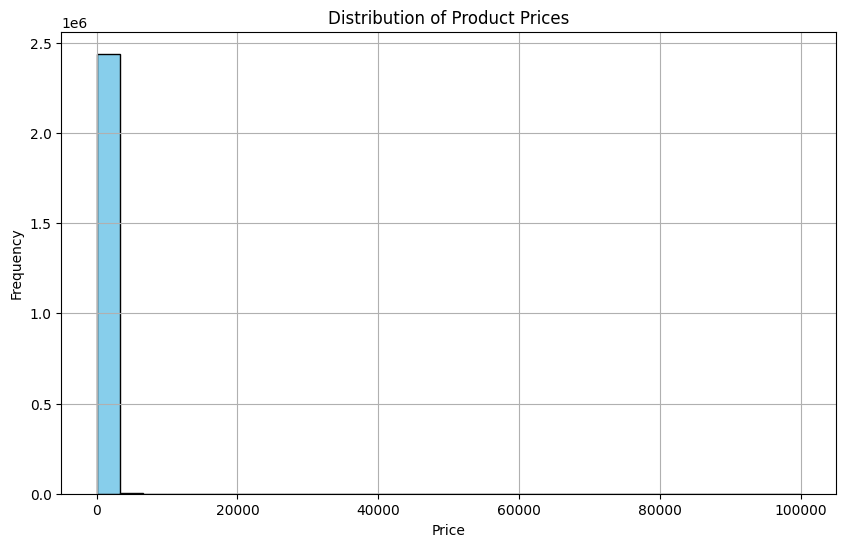

In [10]:


plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

this histogram is visually dominated by a single bar near zero, which makes it hard to interpret the distribution of the rest of the data

because of the extreme Right Skew: Most prices are low, but a few are extremely high

we can apply a logarithmic scale to compress the high values and spread out the lower ones



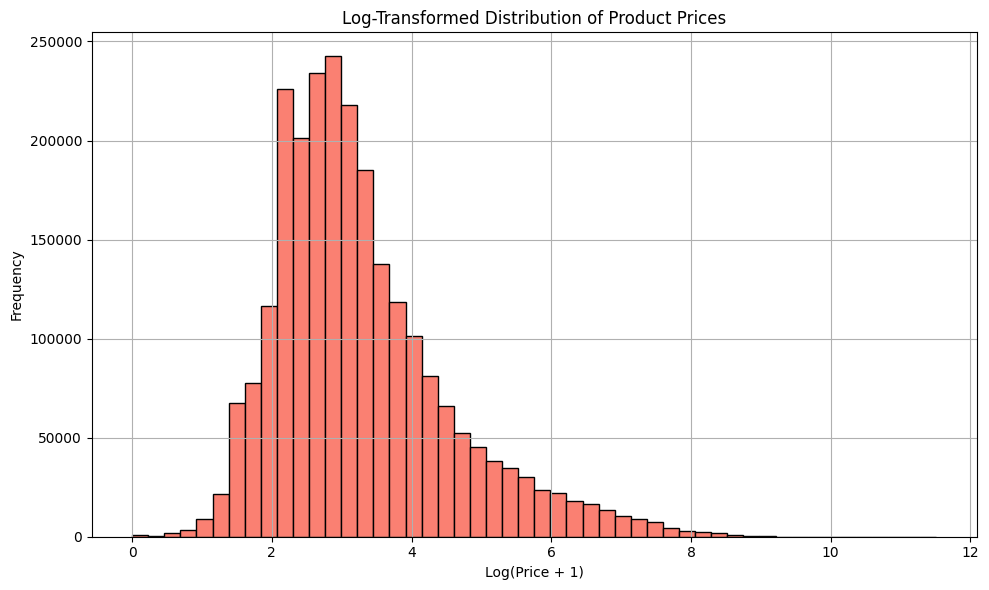

In [11]:


# Add a small constant to avoid log(0)
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(10, 6))
plt.hist(df['log_price'], bins=50, color='salmon', edgecolor='black')
plt.title('Log-Transformed Distribution of Product Prices')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

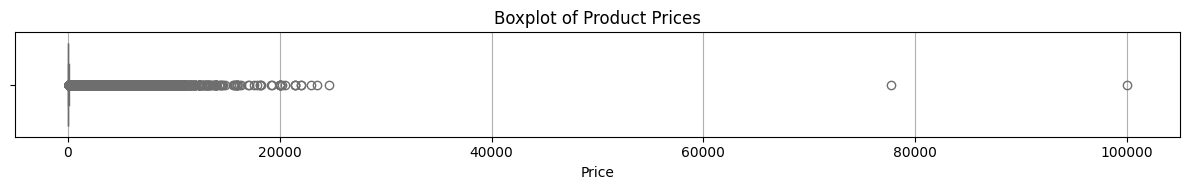

In [12]:



# Boxplot of product prices
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

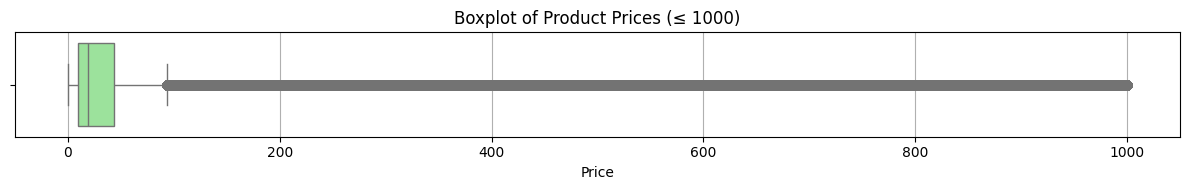

In [13]:
# Zoomed-in boxplot (e.g., prices ≤ 1000)
plt.figure(figsize=(12, 2))
sns.boxplot(x=df[df['price'] <= 1000]['price'], color='lightgreen')
plt.title('Boxplot of Product Prices (≤ 1000)')
plt.xlabel('Price')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Part 3: Unpacking Product Ratings

# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:

* Calculating the mean, median, and mode for the rating of products.

In [14]:
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category', 'log_price'],
      dtype='object')

In [15]:
rated_df = df[df['stars'] > 0]
rated_df
# Mean
mean_rating = rated_df['stars'].mean()

# Median
median_rating = rated_df['stars'].median()

# Mode (can be multiple values)
mode_rating = rated_df['stars'].mode()

# Print results
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating(s): {', '.join(map(str, mode_rating))}")

Mean Rating: 4.32
Median Rating: 4.40
Mode Rating(s): 4.5


- Mean Rating: 4.32 → Customers generally rate products positively.

- Median Rating: 4.40 → Half of the rated products score above 4.4, which is quite high.

- Mode Rating: 4.5 → The most common rating is 4.5, suggesting many users give near-perfect scores.


2. Measures of Dispersion:

* Determining the variance, standard deviation, and interquartile range for product rating.

In [16]:
# Filter out unrated products (stars = 0.0)
rated_df = df[df['stars'] > 0]

# Variance
rating_variance = rated_df['stars'].var()

# Standard Deviation
rating_std = rated_df['stars'].std()

# Interquartile Range (IQR)
q1 = rated_df['stars'].quantile(0.25)
q3 = rated_df['stars'].quantile(0.75)
rating_iqr = q3 - q1

# Print results
print(f"Variance: {rating_variance:.2f}")
print(f"Standard Deviation: {rating_std:.2f}")
print(f"Interquartile Range (IQR): {rating_iqr:.2f}")

Variance: 0.31
Standard Deviation: 0.56
Interquartile Range (IQR): 0.50


Customer ratings are quite consistent.

Most products receive ratings tightly clustered around 4–4.5 stars, with very little variation.


3. Shape of the Distribution:

* Calculating the skewness and kurtosis for the rating column.

In [17]:

# Filter out unrated products
rated_df = df[df['stars'] > 0]

# Skewness
rating_skewness = skew(rated_df['stars'])

# Kurtosis
rating_kurtosis = kurtosis(rated_df['stars'])

# Print results
print(f"Skewness: {rating_skewness:.2f}")
print(f"Kurtosis: {rating_kurtosis:.2f}")

Skewness: -2.38
Kurtosis: 9.78


Skewness: Strong left skew → ratings lean heavily toward higher values

Kurtosis: Very leptokurtic → sharp peak and heavy tails

Ratings are not normally distributed.

Instead, they show a strong bias toward high scores, with most ratings clustered around 4.5 and very few low ratings.


4. Visualizations:

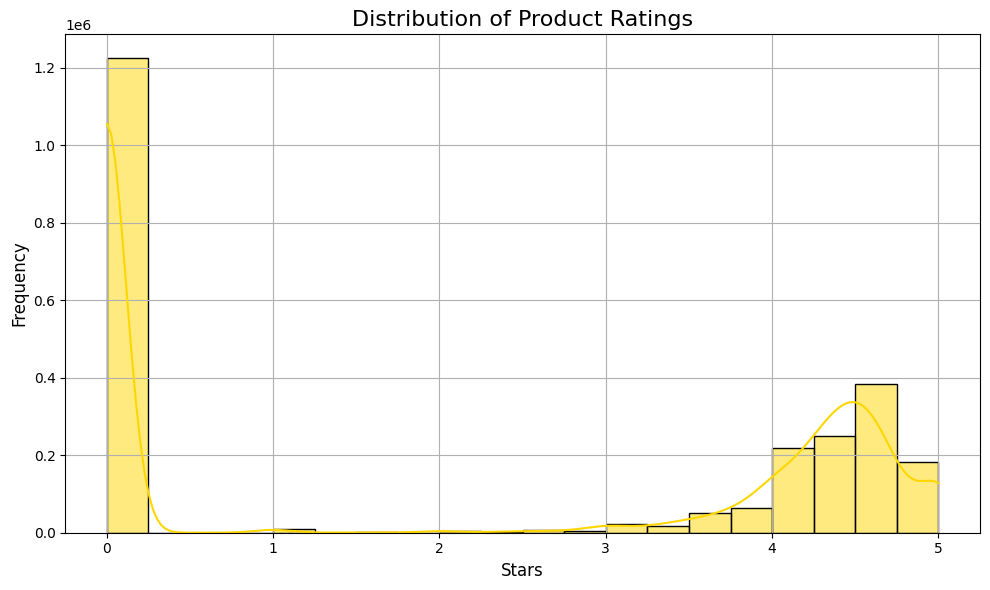

In [21]:
# Plot histogram and KDE for the 'stars' column
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=20, kde=True, color='gold', edgecolor='black')

# Styling
plt.title('Distribution of Product Ratings', fontsize=16)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

based on the histogram, 0 stars is by far the most common rating, with a frequency nearing 1.2 million. That’s a striking insight.


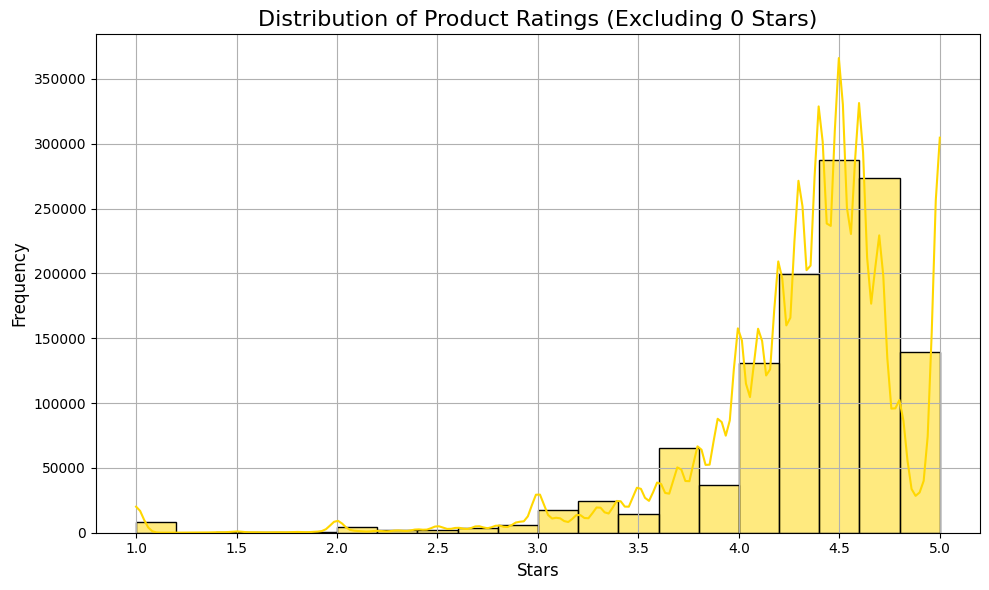

In [19]:

# Filter out 0-star ratings
filtered = df[df['stars'] > 0]

# Plot histogram 
plt.figure(figsize=(10, 6))
sns.histplot(filtered['stars'], bins=20, kde=True, color='gold', edgecolor='black')

# Styling
plt.title('Distribution of Product Ratings (Excluding 0 Stars)', fontsize=16)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

based on the updated histogram, the most common rating is around 4.5 to 5.0 stars, with a clear peak at 5.0 stars.
